In [1]:
import pandas as pd
df = pd.read_excel('HRS_Exam.xls')

In [9]:
from pycaret.classification import *
clf = setup(data=df,target='fivedeathsum',categorical_features=['socengsum'],normalize=True,ignore_low_variance = True,remove_multicollinearity=True,session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"Alive until lost followed: 0, Dead: 1"
3,Original Data,"(7383, 27)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,18
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.8338,0.7407,0.1217,0.5683,0.1985,0.1467,0.2031,0.1266
1,Gradient Boosting Classifier,0.8322,0.7395,0.1308,0.5338,0.2088,0.1520,0.2004,0.7203
2,Linear Discriminant Analysis,0.8301,0.7319,0.1445,0.5020,0.2227,0.1596,0.1994,0.0272
3,Logistic Regression,0.8357,0.7317,0.1263,0.5804,0.2055,0.1548,0.2122,0.0311
4,Ada Boost Classifier,0.8303,0.7273,0.1570,0.5123,0.2380,0.1719,0.2112,0.2144
5,CatBoost Classifier,0.8320,0.7237,0.1468,0.5426,0.2283,0.1669,0.2139,4.2755
6,Light Gradient Boosting Machine,0.8264,0.7206,0.1456,0.4786,0.2217,0.1537,0.1896,0.0959
7,Naive Bayes,0.6881,0.6908,0.5813,0.2914,0.3880,0.2087,0.2312,0.0050
8,Extra Trees Classifier,0.8274,0.6878,0.0409,0.4265,0.0740,0.0458,0.0865,0.1331
9,Random Forest Classifier,0.8262,0.6496,0.0694,0.4337,0.1185,0.0757,0.1163,0.1095


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [11]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8259,0.7335,0.1364,0.4615,0.2105,0.1441,0.1784
1,0.8375,0.7116,0.1477,0.5909,0.2364,0.1806,0.2360
2,0.8298,0.7531,0.0682,0.5000,0.1200,0.0825,0.1353
3,0.8182,0.7266,0.1136,0.3846,0.1754,0.1060,0.1313
4,0.8472,0.7137,0.1250,0.8462,0.2178,0.1820,0.2889
5,0.8433,0.7535,0.1818,0.6400,0.2832,0.2248,0.2818
6,0.8221,0.7310,0.0795,0.3889,0.1321,0.0788,0.1105
7,0.8433,0.7639,0.1250,0.7333,0.2136,0.1726,0.2590
8,0.8333,0.7725,0.1149,0.5263,0.1887,0.1365,0.1868
9,0.8372,0.7477,0.1250,0.6111,0.2075,0.1588,0.2227


In [12]:
bagged_xgb = ensemble_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8356,0.7554,0.1477,0.5652,0.2342,0.1761,0.2268
1,0.8395,0.7051,0.1023,0.6923,0.1782,0.1406,0.2231
2,0.8356,0.7547,0.0682,0.6667,0.1237,0.0951,0.1758
3,0.8143,0.7261,0.0682,0.3000,0.1111,0.0513,0.0693
4,0.8433,0.7151,0.1250,0.7333,0.2136,0.1726,0.2590
5,0.8414,0.7437,0.1477,0.6500,0.2407,0.1897,0.2561
6,0.8298,0.7397,0.1136,0.5000,0.1852,0.1304,0.1760
7,0.8472,0.7721,0.1250,0.8462,0.2178,0.1820,0.2889
8,0.8314,0.7720,0.1149,0.5000,0.1869,0.1322,0.1777
9,0.8372,0.7493,0.1250,0.6111,0.2075,0.1588,0.2227


In [23]:
predict_model(bagged_xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8366,0.7377,0.13,0.5904,0.213,0.1615,0.2206


,house_incomesum,totwealthsum,medcostsum,agesumc,suppsum,discr2006,neighbsum,tests68_6,employsum_Working,medicovsum_Yes,...,stresssumc_1 event,stresssumc_2 events,stresssumc_3 and more events,qualcasumc_not satisfied,marrysumc_Married/Partnered,marrysumc_Separated/Divorced,marrysumc_Widowed,fivedeathsum,Label,Score
0,-0.727571,-0.278607,-0.087354,-0.053613,-0.104710,0.799039,-0.242484,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0.0935
1,-0.497280,0.306769,-0.658204,1.103351,0.891517,-0.374835,-0.242484,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0.2347
2,-0.367304,-0.321007,0.182879,-0.053613,-0.403578,0.799039,1.065489,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.1014
3,-0.226394,-0.045339,-0.134384,-0.053613,1.887743,0.799039,-0.242484,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0732
4,1.984611,1.343360,1.616366,-1.065957,1.389630,0.212102,0.946582,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.1238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,-0.523134,0.063759,-0.435716,-0.921337,0.393404,0.799039,-0.480297,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0477
2211,1.321920,0.651667,0.551444,-1.210578,0.692272,-0.374835,1.778929,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0215
2212,-0.798657,-0.658944,-0.732727,-0.632096,0.393404,0.799039,-0.242484,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.1787
2213,-0.156877,-0.238738,0.124827,0.235628,1.190385,-0.668304,-0.242484,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.0860


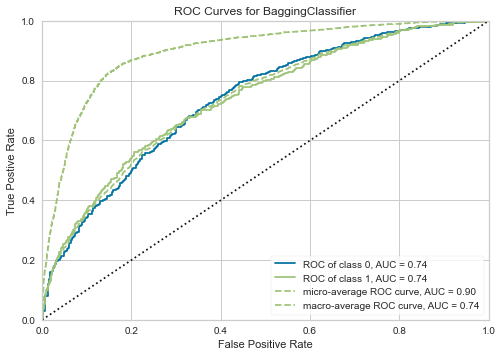

In [24]:
plot_model(bagged_xgb, plot = 'auc')

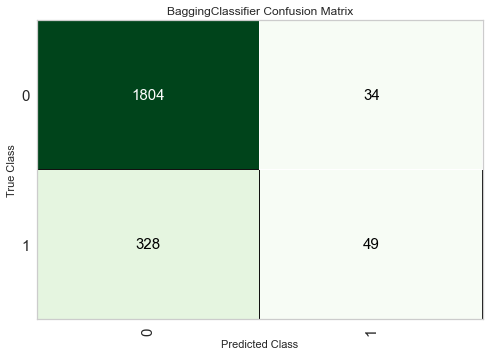

In [25]:
plot_model(bagged_xgb, plot = 'confusion_matrix')

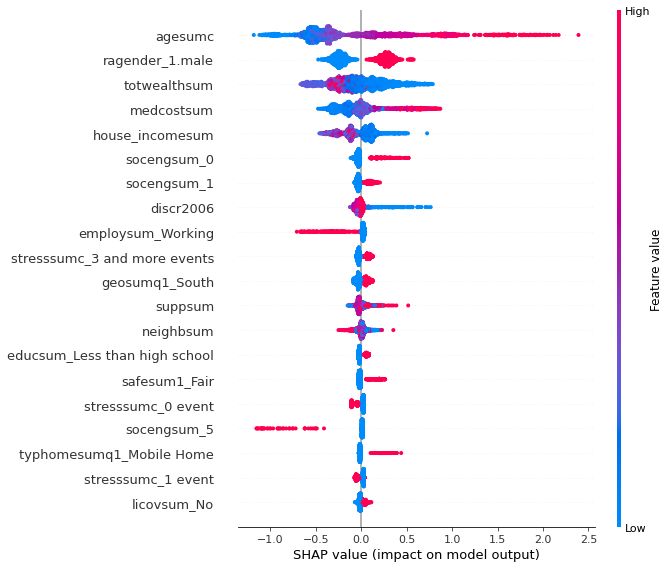

In [16]:
interpret_model(xgboost)